# INFO 2950 Project Phase II

Ray Zhou, Ray Zhang, Alex Weiss, Steven Chen

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
accidents = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')

/Users/steve/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


---

## Research Question

What impact does the **time of day** have on **accident severity** in terms of **numbers of casualties** and **vehicles involved in an accident** in the **various boroughs of New York**?

---

## Data Description

Motor vehicle collision data was downloaded from the NYC OpenData project interface. The observations are each individual accident, and the attributes are CRASH DATE, CRASH TIME, BOROUGH, ZIP CODE, LATITUDE, LONGITUDE, LOCATION, ON STREET NAME, CROSS STREET NAME, OFF STREET NAME, NUMBER OF PERSONS INJURED, NUMBER OF PERSONS KILLED, NUMBER OF PEDESTRIANS INJURED, NUMBER OF PEDESTRIANS KILLED, NUMBER OF CYCLIST INJURED, NUMBER OF CYCLIST KILLED, NUMBER OF MOTORIST INJURED, NUMBER OF MOTORIST KILLED, CONTRIBUTING FACTOR VEHICLE 1, CONTRIBUTING FACTOR VEHICLE 2, CONTRIBUTING FACTOR VEHICLE 3, CONTRIBUTING FACTOR VEHICLE 4, CONTRIBUTING FACTOR VEHICLE 5, COLLISION_ID, VEHICLE TYPE CODE 1, VEHICLE TYPE CODE 2, VEHICLE TYPE CODE 3, VEHICLE TYPE CODE 4, VEHICLE TYPE CODE 5. The website can be found [here](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95). Data points originate from filed MV104-AN police reports, funded by New  York State taxpayer money for the purpose of documenting traffic incidents in New York State.

Processes that might have impacted data collection include geographical socioeconomic limitations (a poorer borough might not report accidents to police/insurance and would directly bring the vehicle to a shop), adaption of technology (while the MV104-AN form has stayed the same adaptations have been made to allow for reporting using paper vs on a digital medium, resulting in more or less data being reported after a certain year), and injury severity being a subjective measure that might have to deal with the backgrounds of individuals involved in each accident (an older individual might report that they are injured for financial compensation while a younger individual might not do as such).

Preprocessing was not done and the data is in the raw form as reported in the original MV104-AN police reports. We simply downloaded the entire dataset from the website listed above, with accients starting in 2014 (the form was slightly different before this date). People were actively involved in the collection of the data as they submitted the MV104-AN reports by themselves to their local police agencies. Since the dataset was of 1.76 million datapoints since 2012 with 29 factors, we can omit certain factors are less related to the research question. For now some important factors include time, borough, persons killed, and persons injured. The types of vehicles involved in an accident are also summarized in five columns, we will have to perform operations to generate another column to sum up the number of vehicles involved in each crash.

---

## Data Collection, and Cleaning

First we can rename some of the columns we will operate on.

In [2]:
accidents = accidents.rename(columns = {'CRASH DATE':'date','CRASH TIME':'time', 'BOROUGH':'borough', 'NUMBER OF PERSONS KILLED': 'killed', 'NUMBER OF PERSONS INJURED': 'injured'})

First we can evaluate the number of vehicles involved in an accident. In the original dataset, there are five columns. As crashes are arranged by row, the columns filled represents the types of vehicles involved, with NaN meaning a vehicle was not involved in a crash. By counting the number of NaNs in each row of the vehicle involved dataframe we can determine the total number of vehicles in a crash. We can append this to the original dataset in a new column called 'vehicles_involved'.

In [3]:
vehicle_types = ['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']
accident_vehicles = accidents[vehicle_types]

accidents['vehicles_involved'] = 5-accident_vehicles.isnull().sum(axis = 1)



We also create a list of factors which have to deal with the research question. We want to see if the time of day impacts the severity of a crash in terms of
1. Number of casualties 
2. Number of vehicles involved

and we are analyzing this in each borough.

Using this list of factors we subset the accidents data.

In [4]:
factors = ['date', 'time', 'borough', 'killed', 'injured', 'vehicles_involved']
accidents = accidents[factors]

Next we can focus only on accidents in the incorporated boroughs. According to the data origin from New York State MV-104AN forms, accidents not given a borough (represented by NaN) occured in an nearby county (which we will omit).

In [5]:
accidents = accidents.dropna(subset = ["borough"])
# the current index represents the previous indices of crashes including those outside the five boroughs
accidents.head()

,date,time,borough,killed,injured,vehicles_involved
0,03/05/2020,20:30,MANHATTAN,0.0,1.0,1
1,03/07/2020,19:13,BROOKLYN,0.0,0.0,2
2,05/02/2020,14:00,MANHATTAN,0.0,1.0,2
4,04/03/2020,16:25,BROOKLYN,0.0,0.0,4
5,03/09/2020,13:00,BRONX,0.0,0.0,1


Now we generate a new column of time objects. Since we have two columns with the date and the time of day, we can concatenate into one column, and using Pandas to_datetime(), parse into time objects.

In [6]:
accidents['parsed_time'] = pd.to_datetime(accidents.date + accidents.time, format = '%m/%d/%Y%H:%M')
accidents.head()

,date,time,borough,killed,injured,vehicles_involved,parsed_time
0,03/05/2020,20:30,MANHATTAN,0.0,1.0,1,2020-03-05 20:30:00
1,03/07/2020,19:13,BROOKLYN,0.0,0.0,2,2020-03-07 19:13:00
2,05/02/2020,14:00,MANHATTAN,0.0,1.0,2,2020-05-02 14:00:00
4,04/03/2020,16:25,BROOKLYN,0.0,0.0,4,2020-04-03 16:25:00
5,03/09/2020,13:00,BRONX,0.0,0.0,1,2020-03-09 13:00:00


According to the handbook "You should be saving data in intermediate files at several points through this process so that you are not starting from scratch every time you change something". To do so we will use Pandas to_csv() method.

In [7]:
accidents.to_csv('cleaned_accidents.csv')

---

## Data Limitations

While our data mostly consisted of meaningful cardinal variables, the variable 'vehicles_involved' could have been difficult to measure in scale. As it usually included a few cars, bikes, or other vehicles (trucks, forklifts, e-scooters), it could have been possible that in an accident, a vehicle was lightly damaged and not counted in the list.

These could affect our results as there could be a confounding variable behind  people who choose to report the severity of damage. It is possible that at a later hour of the day, people might not notice or care about the severity of a smaller accident and simply want to go home, which could influence our research question. Additonally, certain boroughs might have poorer individals who drive older cars and might not report damage that would have otherwise been reported on a nicer vehicle. 

Looking at this data, we have also come to a conclusion that this data from New York City may not apply to other areas and this is because in New York City, a lot of the people also rely on public transportation. In places that are more rural, you would expect more people to use cars.


---

## Summary Statistics/Exploratory Data Analysis

In [24]:
print('{} {:.4f}'.format('Mean vehicles involved:', np.mean(accidents.vehicles_involved)))
print('{} {:.4f}'.format('Standard deviation of vehicles involved', np.std(accidents.vehicles_involved)))
print()
print('{} {:.4f}'.format('Mean Injured:', np.mean(accidents.injured)))
print('{} {:.4f}'.format('Standard deviation of injured', np.std(accidents.injured)))
print()
print('{} {:.4f}'.format('Mean killed:', np.mean(accidents.killed)))
print('{} {:.4f}'.format('Standard deviation of killed', np.std(accidents.killed)))
print()
print(accidents.groupby(["borough"])["vehicles_involved"].mean())

Mean vehicles involved: 1.8940
Standard deviation of vehicles involved 0.5386

Mean Injured: 0.2603
Standard deviation of injured 0.6418

Mean killed: 0.0011
Standard deviation of killed 0.0358

borough
BRONX            1.856926
BROOKLYN         1.897960
MANHATTAN        1.893819
QUEENS           1.910230
STATEN ISLAND    1.887740
Name: vehicles_involved, dtype: float64


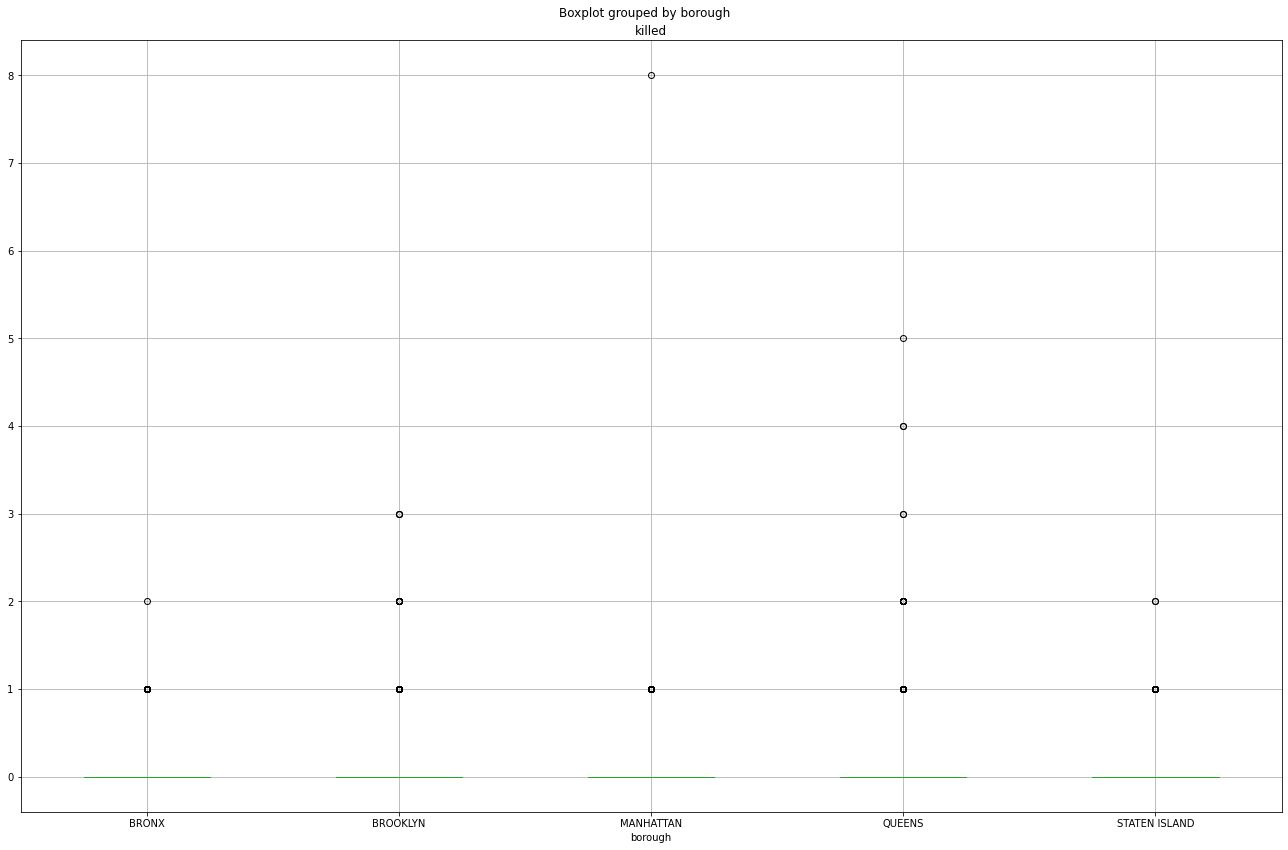

In [12]:
accidents.boxplot('killed', by='borough', figsize=(18,12))
plt.tight_layout()
plt.show()

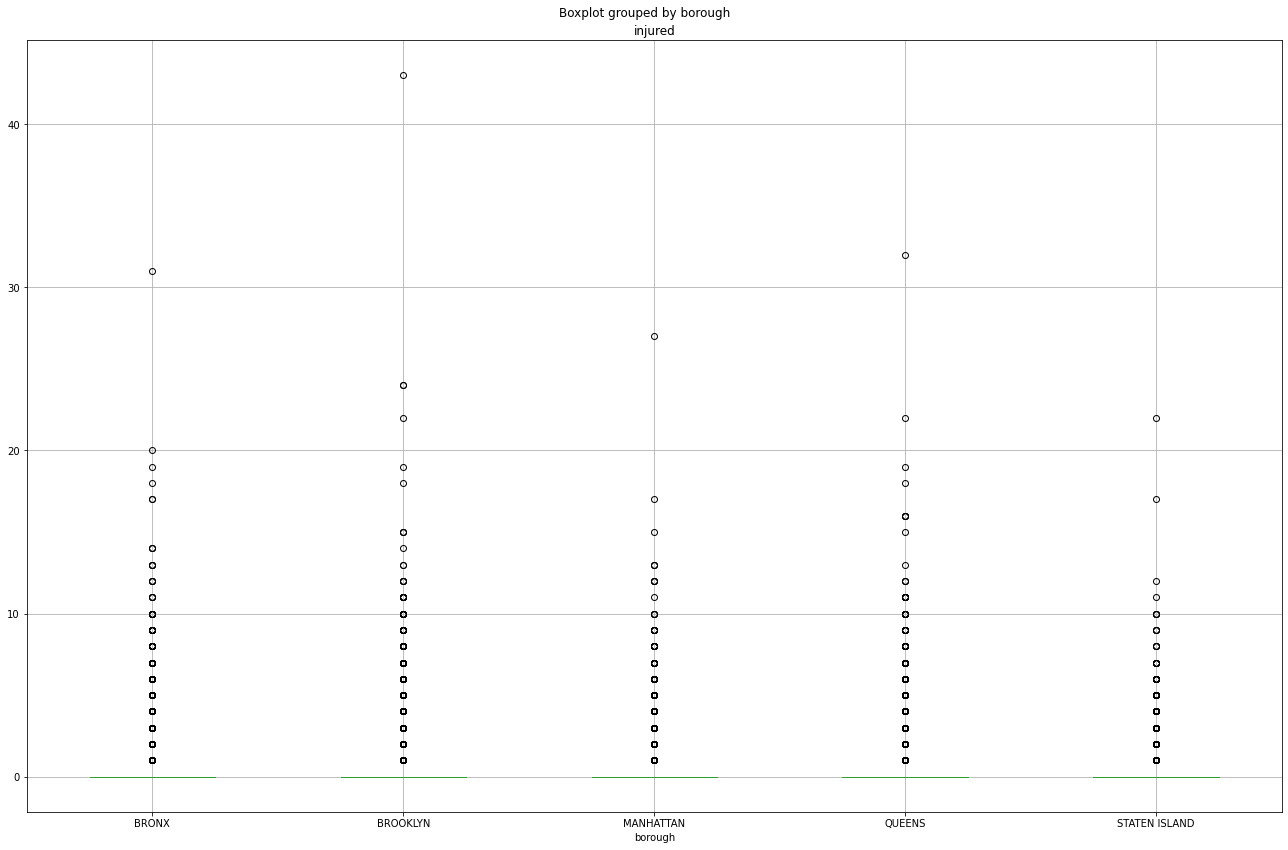

In [13]:
accidents.boxplot('injured', by='borough', figsize=(18,12))
plt.tight_layout()
plt.show()

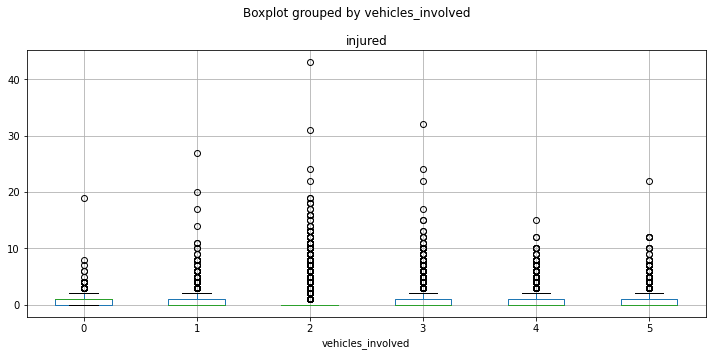

In [23]:
accidents.boxplot('injured', by='vehicles_involved', figsize=(10,5))
plt.tight_layout()
plt.show()

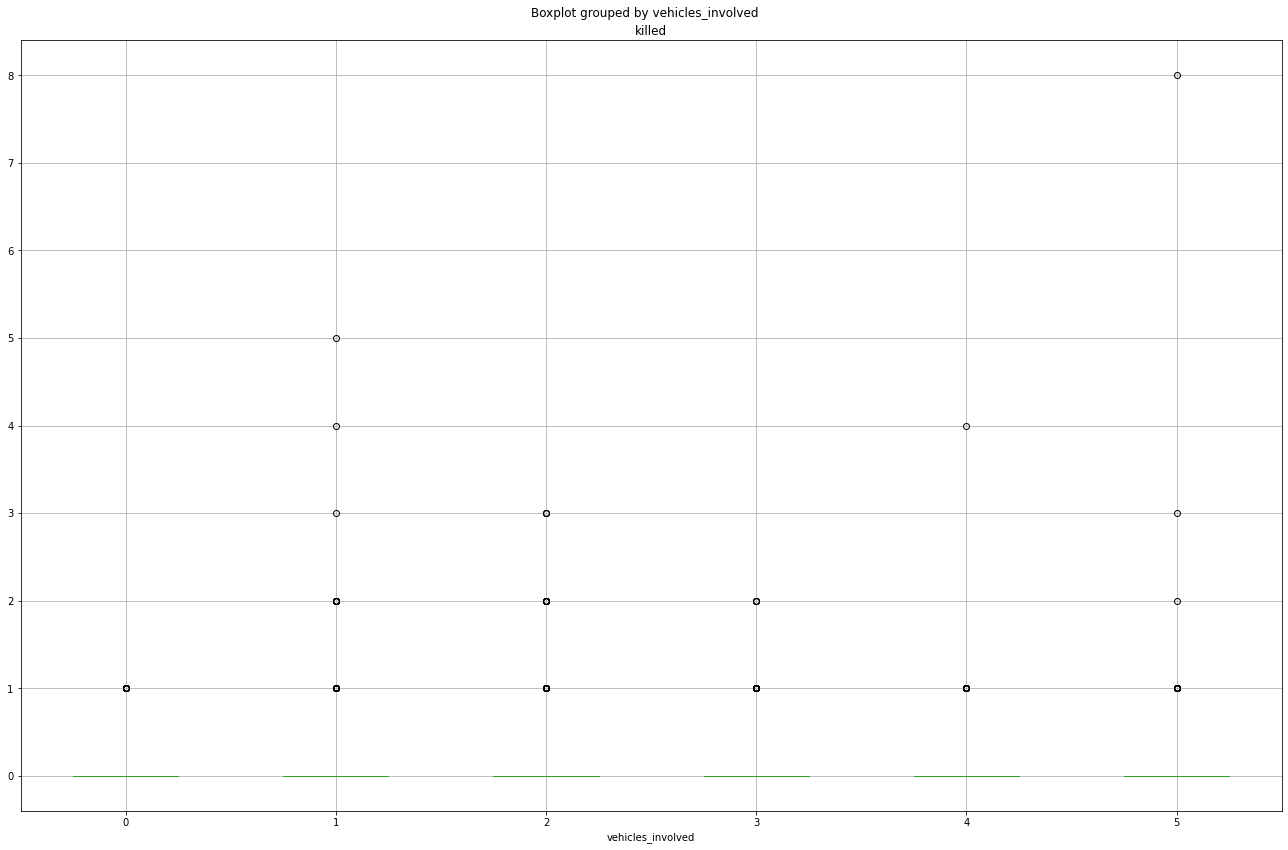

In [21]:
accidents.boxplot('killed', by='vehicles_involved', figsize=(18,12))
plt.tight_layout()
plt.show()

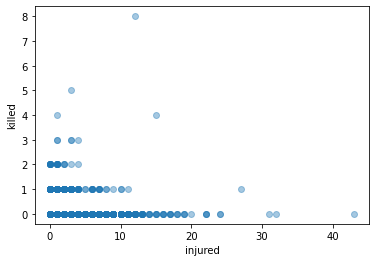

In [16]:
plt.scatter(accidents['injured'], accidents['killed'], alpha=0.4)
plt.xlabel('Injured')
plt.ylabel('Killed')
plt.show()

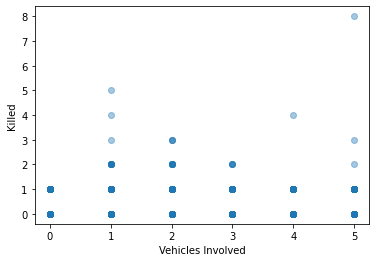

In [20]:
plt.scatter(accidents['vehicles_involved'], accidents['killed'], alpha=0.4)
plt.xlabel('Vehicles Involved')
plt.ylabel('Killed')
plt.show()

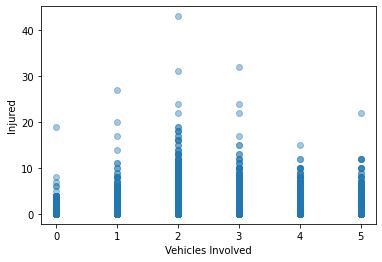

In [19]:
plt.scatter(accidents['vehicles_involved'], accidents['injured'], alpha=0.4)
plt.xlabel('Vehicles Involved')
plt.ylabel('Injured')
plt.show()

Analysis:

One surprising find in the first and second boxplot is that the median number of people killed and injured are 0. This is a surprising find because one might expect that there would be a higher median number of people killed/injured in accidents. This fact is also true regardless of the borough that the accidnet occurred in, which is even more surprising – we expected the data to vary more by borough.  

In our entire data set, the mean number of vehicles in a given accident is around 1.9 and the standard deviation of the number of vehicles involved is around 0.5. 

In our entire data set, the mean number of people injured in a given accident is around .3 and the standard deviation for the number of people injured is around .6. 

In our entire data set, the mean number of people killed in a given accident is around 0.001 and the standard deviation for the number of people killed is around 0.04. 

The mean number of vehicles involved in a car accident tells us that in a given accident, there is on average 2 cars involved. In a sense this is somewhat logical, because when you normally see accidents occur, it involves the collision of 2 vehicles.

The mean number of people injured in a given accident is bigger than the mean number people killed in a given accident also makes sense intuitively because one of the biggest selling points of car today is in the safety aspect of the car. 

Another surprising find in our data set is that in the scatterplot, as the mean number of vehicles involved in a given accident increased, the number of accidents does not also increase. This means that there is no positive correlation between the amount of vehicles in a accident and the amount of people hurt. You would normally expect that as more vehicles are involved in accidents, more people would be injured, but that is not the case here. When looking at the scatterplot that shows the relationship between the mean number of vehicles involved in a given accident and the mean number of people killed, we observed that there is also no positive correlation. The mean number of people killed is somewhat expected because it is normally the serverity of the accident that affect the number of people killed, and more vehicles involved in a accident does not necessarily imply that the accident was more severe. 

---

## Questions for Reviewers

1. What conclusion can we come to if one borough has significantly more accident casualties/vehicles involved than another? Essentially, if you have five categorical variables, what kind of correlation conclusion can you come to? Are there any tests that can be done to compare such categorical variables?

2. How much can we extrapolate this data from New York City to other areas?

3. Should we have looked into the time of day that the accident occurred versus the number of people killed/injured.

4. Should we have look into the time of day that the accident occurred versus the number of vehicles involved in a given accident.